# Microsoft Movie Studio

# Overview

This project analyzes the <span style='color:blue'>global film market landscape</span>. Currently, countless movies are pouring out into the film market, and a lot of video content studios invest large amounts of money to create movies. So, this analysis will **help <span style='color:purple'>Microsoft Movie Studio</span> make the right decision in deploying their business strategy successfully while entering the new business domain .** So, this analysis focuses on **What genre of movie to Make, How Much to Invest, and When to release it.**

# Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. The initial problem being that. Microsoft is going to enter a new business field and develop new revenue streams, and they want to ensure the success of the first-time project. So, I will explore **<span style='color:red'>what kind of movies, what budget-size of movies</span>** are currently doing the best at the box office, and then translates those findings into ***actionable insights*** that the head of Microsoft's new movie studio can use to decide what kind and what size of movies to create and when is the best release time.

# Data Understanding
The datasets were collected from 'The Numbers' and 'IMDB'.   
These data files provide the release date, production budgets, domestic and foreign gross, genres of each movie, as well as movie titles.

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## <span style='color:blue'>The Numbers Dataset</span>

In [182]:
movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [183]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


**- Change the "release_date" data type from object to datetime**

In [184]:
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])
movie_budgets.sort_values(by='release_date', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,95,2020-12-31,Moonfall,"$150,000,000",$0,$0
1205,6,2020-12-31,Hannibal the Conqueror,"$50,000,000",$0,$0
535,36,2020-02-21,Call of the Wild,"$82,000,000",$0,$0
480,81,2019-12-31,Army of the Dead,"$90,000,000",$0,$0
3515,16,2019-12-31,Eli,"$11,000,000",$0,$0
...,...,...,...,...,...,...
5606,7,1925-11-19,The Big Parade,"$245,000","$11,000,000","$22,000,000"
5683,84,1920-09-17,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
5614,15,1916-12-24,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
5523,24,1916-09-05,Intolerance,"$385,907",$0,$0


This data shows the budget and sales performance for each movie from 1915 to 2020.

## <span style='color:blue'>The imdb dataset</span>

In [185]:
! unzip -n zippedData/im.db.zip

Archive:  zippedData/im.db.zip


In [186]:
import sqlite3

In [187]:
conn = sqlite3.connect("im.db")

In [188]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [189]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


This dataset contains records showing the title and genres of each movie.

# Data Preparation

## <span style='color:blue'>The Numbers Dataset</span>

In [190]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


*- Drop unnecessary column, and Change column name*

In [191]:
# Drop unnecessary 'id' column

movie_budgets = movie_budgets.drop(columns=['id'])

In [192]:
# For the merge of two dataframe, unifying the column name

movie_budgets = movie_budgets.rename(columns={'movie':'movie_title'})

*- For the ROI calculation, change the 'budgets' and 'gross' data type from object to int*

In [193]:
movie_budgets['production_budget']=movie_budgets['production_budget'].str.replace(pat=r'[^\w]', repl=r'', regex=True).astype('int64')

In [194]:
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace(pat=r'[^\w]', repl=r'', regex=True).astype('int64')

In [195]:
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(pat=r'[^\w]', repl=r'', regex=True).astype('int64')

*-Make new column('release_month', 'total_gross', 'return_on_investment') and Drop 'o' value 'return_on_investment' rows*

In [196]:
# Make new column - 'Release Month'

movie_budgets['release_month'] = movie_budgets['release_date'].dt.month

In [197]:
# Calculate R O I (Return on Investment = Total Gross / Production Budget )
# Make new column - 'return_on_investment'

movie_budgets['total_gross'] = movie_budgets['domestic_gross'] + movie_budgets['worldwide_gross']
movie_budgets['return_on_investment'] = ( round(movie_budgets['total_gross'] / 
                                                                   movie_budgets['production_budget'], 2).astype('float') )

In [198]:
# Drop the '0' ROI rows

movie_budgets = movie_budgets[movie_budgets.return_on_investment != 0]

In [199]:
# Change the 'production_budget' unit to 'Million Dollar'

movie_budgets['production_budget'] = round(movie_budgets['production_budget'] / 1000000, 2)
movie_budgets.head()

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,release_month,total_gross,return_on_investment
0,2009-12-18,Avatar,425.0,760507625,2776345279,12,3536852904,8.32
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6,241063875,1045663875,5,1286727750,3.13
2,2019-06-07,Dark Phoenix,350.0,42762350,149762350,6,192524700,0.55
3,2015-05-01,Avengers: Age of Ultron,330.6,459005868,1403013963,5,1862019831,5.63
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,620181382,1316721747,12,1936903129,6.11


In [200]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5361 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   release_date          5361 non-null   datetime64[ns]
 1   movie_title           5361 non-null   object        
 2   production_budget     5361 non-null   float64       
 3   domestic_gross        5361 non-null   int64         
 4   worldwide_gross       5361 non-null   int64         
 5   release_month         5361 non-null   int64         
 6   total_gross           5361 non-null   int64         
 7   return_on_investment  5361 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 376.9+ KB


*-Filtering the necessary columns*

In [201]:
movie_budgets_clean = movie_budgets.loc[:, ['movie_title', 'production_budget', 'return_on_investment', 'release_month']]
movie_budgets_clean.head()

,movie_title,production_budget,return_on_investment,release_month
0,Avatar,425.0,8.32,12
1,Pirates of the Caribbean: On Stranger Tides,410.6,3.13,5
2,Dark Phoenix,350.0,0.55,6
3,Avengers: Age of Ultron,330.6,5.63,5
4,Star Wars Ep. VIII: The Last Jedi,317.0,6.11,12


In [202]:
movie_budgets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5361 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           5361 non-null   object 
 1   production_budget     5361 non-null   float64
 2   return_on_investment  5361 non-null   float64
 3   release_month         5361 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 209.4+ KB


## <span style='color:blue'>The imdb Dataset</span>

In [203]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


*-Change column name and Drop the Null*

In [204]:
# For the merge of two dataframe, unifying the column name

movie_basics = movie_basics.rename(columns={'primary_title':'movie_title'})
movie_basics

,movie_id,movie_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [205]:
# Check the Null

movie_basics['genres'].isnull().sum()

5408

In [206]:
movie_basics_null_genre = movie_basics[movie_basics['genres'].isnull()]
movie_basics_null_genre.index

Int64Index([    16,     22,     35,     40,     44,     45,    398,    560,
               615,    619,
            ...
            146082, 146083, 146085, 146086, 146087, 146088, 146089, 146107,
            146129, 146142],
           dtype='int64', length=5408)

In [207]:
# Drop the Null

movie_basics = movie_basics.drop(movie_basics_null_genre.index)

*-Filtering the necessary columns*

In [208]:
movie_basics_clean = movie_basics.loc[:, ['movie_title', 'genres']]
movie_basics_clean.head()

,movie_title,genres
0,Sunghursh,"Action,Crime,Drama"
1,One Day Before the Rainy Season,"Biography,Drama"
2,The Other Side of the Wind,Drama
3,Sabse Bada Sukh,"Comedy,Drama"
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy"


In [209]:
movie_basics_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   movie_title  140736 non-null  object
 1   genres       140736 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


## <span style='color:blue'>Merging Dataset</span>

In [210]:
movie_data = pd.merge(movie_budgets_clean, movie_basics_clean, how='inner', on='movie_title')
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3334 entries, 0 to 3333
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           3334 non-null   object 
 1   production_budget     3334 non-null   float64
 2   return_on_investment  3334 non-null   float64
 3   release_month         3334 non-null   int64  
 4   genres                3334 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 156.3+ KB


*-Drop Duplicates*

In [211]:
movie_data.duplicated('movie_title').sum()

1278

In [212]:
movie_data = movie_data.drop_duplicates(subset=['movie_title'], keep = 'last')
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 3333
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           2056 non-null   object 
 1   production_budget     2056 non-null   float64
 2   return_on_investment  2056 non-null   float64
 3   release_month         2056 non-null   int64  
 4   genres                2056 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 96.4+ KB


In [213]:
movie_data.head()

,movie_title,production_budget,return_on_investment,release_month,genres
0,Avatar,425.0,8.32,12,Horror
1,Pirates of the Caribbean: On Stranger Tides,410.6,3.13,5,"Action,Adventure,Fantasy"
2,Dark Phoenix,350.0,0.55,6,"Action,Adventure,Sci-Fi"
3,Avengers: Age of Ultron,330.6,5.63,5,"Action,Adventure,Sci-Fi"
4,Avengers: Infinity War,300.0,9.09,4,"Action,Adventure,Sci-Fi"


**DROP OUTLIER**    *-Check the "Return_on_investment" outlier and drop the outlier*

In [214]:
movie_data['return_on_investment'].describe()

count    2056.000000
mean        6.913633
std        25.068477
min         0.010000
25%         1.160000
50%         2.990000
75%         6.060000
max       644.210000
Name: return_on_investment, dtype: float64

<AxesSubplot:>

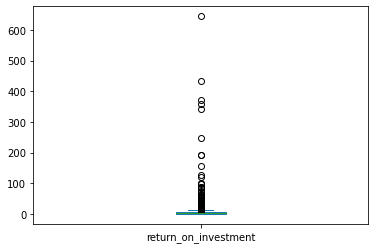

In [215]:
movie_data['return_on_investment'].plot.box()

In [216]:
q1 = movie_data['return_on_investment'].quantile(0.25)
q2 = movie_data['return_on_investment'].quantile(0.50)
q3 = movie_data['return_on_investment'].quantile(0.75)
iqr = q3 - q1
iqr

4.8999999999999995

In [217]:
condition=movie_data['return_on_investment'] > ( q3 + 1.5*iqr )
roi_outlier = movie_data[condition].index
roi_outlier.sort_values(['return_on_investment'], ascending=False)

(Int64Index([3332, 3331, 3330, 3328, 3321, 3313, 3312, 3311, 3300, 3286,
             ...
              462,  400,  379,  267,  246,  177,  132,   78,   41,   38],
            dtype='int64', length=180),
 array([179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167,
        166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154,
        153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141,
        140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128,
        127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115,
        114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102,
        101, 100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,
         88,  87,  86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,
         75,  74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,
         62,  61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51,  50,
         49,  48,  47,  46,  45,  44,  43,  42,  41,  40,  39,  38

In [218]:
movie_clean_data = movie_data.drop(roi_outlier)
movie_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1876 entries, 0 to 3333
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           1876 non-null   object 
 1   production_budget     1876 non-null   float64
 2   return_on_investment  1876 non-null   float64
 3   release_month         1876 non-null   int64  
 4   genres                1876 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 87.9+ KB


In [219]:
movie_clean_data['return_on_investment'].sort_values(ascending=False)

2096    13.38
1753    13.32
2136    13.30
1181    13.26
1650    13.23
        ...  
1542     0.01
3027     0.01
2030     0.01
2035     0.01
2751     0.01
Name: return_on_investment, Length: 1876, dtype: float64

In [220]:
movie_clean_data['return_on_investment'].describe()

count    1876.000000
mean        3.436439
std         3.071231
min         0.010000
25%         1.000000
50%         2.640000
75%         5.012500
max        13.380000
Name: return_on_investment, dtype: float64

<AxesSubplot:>

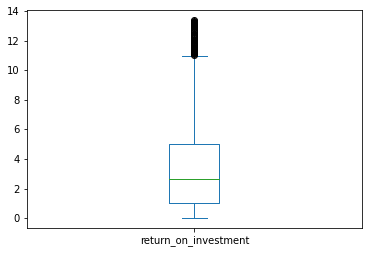

In [221]:
movie_clean_data['return_on_investment'].plot.box()

In [222]:
movie_clean_data.head()

,movie_title,production_budget,return_on_investment,release_month,genres
0,Avatar,425.0,8.32,12,Horror
1,Pirates of the Caribbean: On Stranger Tides,410.6,3.13,5,"Action,Adventure,Fantasy"
2,Dark Phoenix,350.0,0.55,6,"Action,Adventure,Sci-Fi"
3,Avengers: Age of Ultron,330.6,5.63,5,"Action,Adventure,Sci-Fi"
4,Avengers: Infinity War,300.0,9.09,4,"Action,Adventure,Sci-Fi"


# Analysis

## <span style='color:blue'>1. What Genre of Movie to Make (ROI BY GENRE) </span>

Creating a movie is a new business domain for Microsoft, so ***"what genre of movie to make"*** is the most significant issue. First of all, they should decide on the movie genre that they are going to make. So, I will take a look at the number of released movie and ROI by genre.

### <span style='color:brown'>*  Analyzing with single GENRE</span>

* Explode the 'Genres' column

In [223]:
# Separate the mixed Genres in 'GENRES" column
# First, split the strings in 'genres' column for explode GENRES

movie_clean_data['genre_list'] = movie_clean_data['genres'].str.split(',')
movie_clean_data

,movie_title,production_budget,return_on_investment,release_month,genres,genre_list
0,Avatar,425.00,8.32,12,Horror,[Horror]
1,Pirates of the Caribbean: On Stranger Tides,410.60,3.13,5,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]"
2,Dark Phoenix,350.00,0.55,6,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
3,Avengers: Age of Ultron,330.60,5.63,5,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
4,Avengers: Infinity War,300.00,9.09,4,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
...,...,...,...,...,...,...
3322,Counting,0.05,0.33,7,Documentary,[Documentary]
3323,Raymond Did It,0.04,0.18,2,Horror,[Horror]
3324,Krisha,0.03,9.65,3,Drama,[Drama]
3327,Emily,0.03,0.26,1,Documentary,[Documentary]


In [224]:
movie_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1876 entries, 0 to 3333
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           1876 non-null   object 
 1   production_budget     1876 non-null   float64
 2   return_on_investment  1876 non-null   float64
 3   release_month         1876 non-null   int64  
 4   genres                1876 non-null   object 
 5   genre_list            1876 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 102.6+ KB


In [225]:
movie_genre_data = movie_clean_data.explode('genre_list')
movie_genre_data

,movie_title,production_budget,return_on_investment,release_month,genres,genre_list
0,Avatar,425.00,8.32,12,Horror,Horror
1,Pirates of the Caribbean: On Stranger Tides,410.60,3.13,5,"Action,Adventure,Fantasy",Action
1,Pirates of the Caribbean: On Stranger Tides,410.60,3.13,5,"Action,Adventure,Fantasy",Adventure
1,Pirates of the Caribbean: On Stranger Tides,410.60,3.13,5,"Action,Adventure,Fantasy",Fantasy
2,Dark Phoenix,350.00,0.55,6,"Action,Adventure,Sci-Fi",Action
...,...,...,...,...,...,...
3323,Raymond Did It,0.04,0.18,2,Horror,Horror
3324,Krisha,0.03,9.65,3,Drama,Drama
3327,Emily,0.03,0.26,1,Documentary,Documentary
3333,Newlyweds,0.01,1.02,1,"Comedy,Drama",Comedy


In [226]:
movie_genre_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4226 entries, 0 to 3333
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           4226 non-null   object 
 1   production_budget     4226 non-null   float64
 2   return_on_investment  4226 non-null   float64
 3   release_month         4226 non-null   int64  
 4   genres                4226 non-null   object 
 5   genre_list            4226 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 231.1+ KB


#### * Number of Movies BY SINGLE GENRE

In [227]:
movie_genre_data['genre_list'].value_counts()

Drama          892
Comedy         534
Action         448
Adventure      351
Thriller       261
Crime          234
Romance        200
Documentary    190
Horror         174
Biography      142
Sci-Fi         139
Fantasy        122
Mystery        119
Family         102
Animation      101
Music           55
History         52
Sport           45
War             32
Western         16
Musical         13
News             4
Name: genre_list, dtype: int64

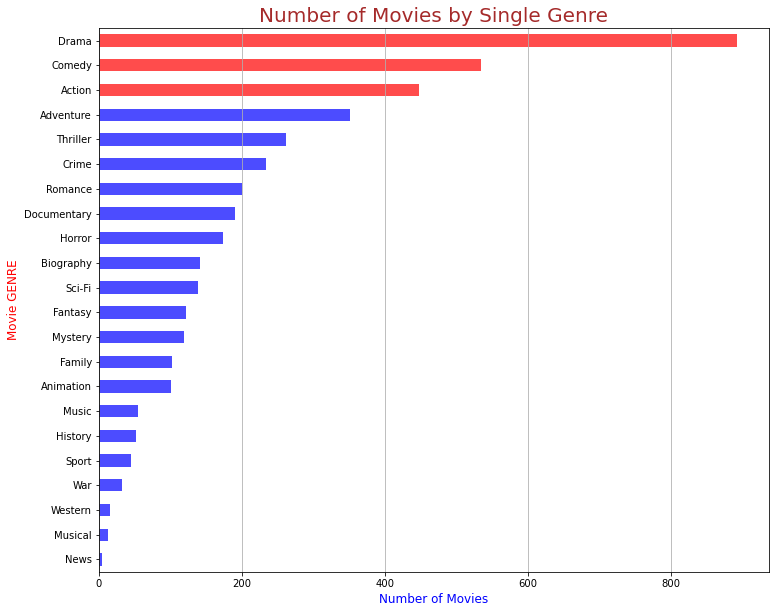

In [228]:
movie_genre_num = movie_genre_data['genre_list'].value_counts(ascending=True)
color_n = ['red' if num >= 400  else 'blue' for num in movie_genre_num]
ax = movie_genre_num.plot(kind='barh', color=color_n, alpha=0.7, figsize=(12, 10))
ax.set_title('Number of Movies by Single Genre', color='Brown', size=20)
ax.set_xlabel('Number of Movies', color='Blue', size=12)
ax.set_ylabel('Movie GENRE', color='Red', size=12)
ax.grid(True, axis='x');

Among the 4,226 sample, **'Drama'** is the most released movie genre then Comedy and Action. 

#### * ROI BY SINGLE GENRE

In [229]:
movie_genre_roi = movie_genre_data.groupby('genre_list').mean()['return_on_investment'].sort_values(ascending=True)
movie_genre_roi.describe()

count    22.000000
mean      3.457931
std       0.645103
min       2.411875
25%       2.896410
50%       3.483092
75%       3.895300
max       4.530396
Name: return_on_investment, dtype: float64

In [230]:
movie_genre_roi

genre_list
Western        2.411875
War            2.537187
News           2.585000
Sport          2.624444
Documentary    2.770105
Crime          2.871496
History        2.971154
Biography      3.281408
Drama          3.334832
Thriller       3.360536
Action         3.461183
Fantasy        3.505000
Family         3.561961
Comedy         3.783764
Romance        3.822500
Adventure      3.887236
Horror         3.897989
Sci-Fi         4.034748
Music          4.153636
Mystery        4.165714
Musical        4.522308
Animation      4.530396
Name: return_on_investment, dtype: float64

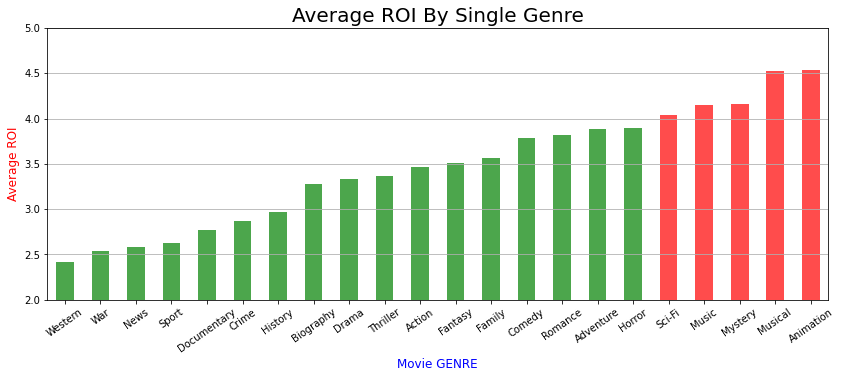

In [231]:
color_g = ['red' if roi > 4  else 'green' for roi in movie_genre_roi]
ax = movie_genre_roi.plot(kind='bar', color=color_g, alpha = 0.7, rot=35, figsize=(14, 5))
ax.set_title('Average ROI By Single Genre', size=20)
ax.set_xlabel('Movie GENRE', color='Blue', size=12)
ax.set_ylabel('Average ROI', color='Red', size=12)
ax.set_ylim(2, 5)
ax.grid(True, axis='y');

The most profitable movie genre is the **<span style='color:red'>'Animation'</span>** then **<span style='color:blue'>'Musical', 'Mystery', 'Music' and  'Sci-Fi'</span>**  follows it.

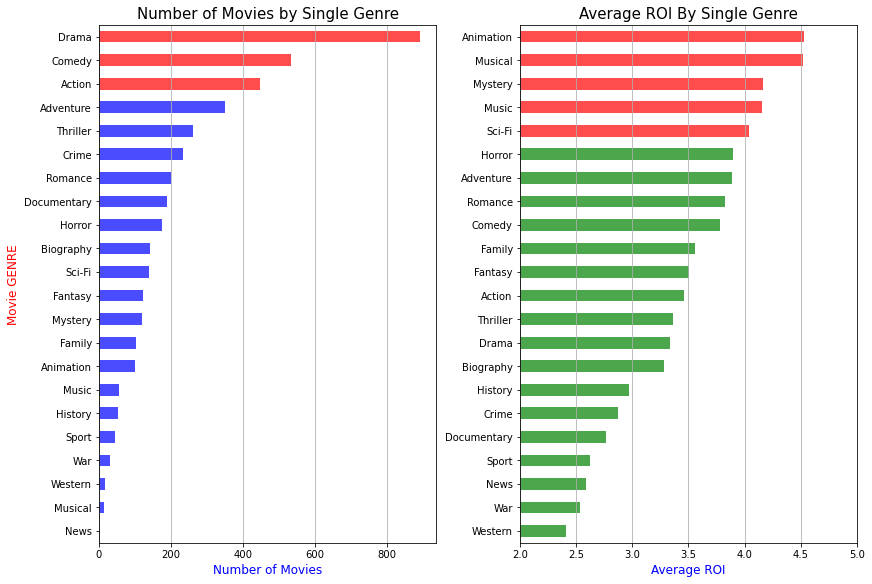

In [232]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

color_n = ['red' if num >= 400  else 'blue' for num in movie_genre_num]
ax1 = movie_genre_num.plot(ax=axes[0], kind='barh', color=color_n, alpha=0.7)
ax1.set_title('Number of Movies by Single Genre', size=15)
ax1.set_xlabel('Number of Movies', color='Blue', size=12)
ax1.set_ylabel('Movie GENRE', color='Red', size=12)
ax1.grid(True, axis='x')

color_g = ['red' if roi > 4  else 'green' for roi in movie_genre_roi]
ax2 = movie_genre_roi.plot(ax=axes[1], kind='barh', color=color_g, alpha=0.7, rot=0)
ax2.set_title('Average ROI By Single Genre', size=15)
ax2.set_xlabel('Average ROI', color='Blue', size=12)
ax2.set_xlim(2, 5)
ax2.set_ylabel('')
ax2.grid(True, axis='x');

The <span style='color:blue'>high 'ROI'</span> movie genres are <span style='color:red'>Animation', 'Musical', 'Mystery', 'Music' and 'Sci-Fi'</span>, whereas the <span style='color:brown'>most released</span> movie genres are <span style='color:purple'>'Drama', 'Comedy' and 'Action'</span>.

### <span style='color:brown'>*  Analyzing with MIXED GENRE</span>

However, almost all movies are made by mixing two or more genres. Therefore, it is necessary to examine the ROI of **mixed genres** movies.

#### * Number of Movies BY MIXED GENRE

In [233]:
movie_clean_data['genres'].value_counts()

Drama                         174
Documentary                   125
Comedy                         77
Adventure,Animation,Comedy     59
Comedy,Drama                   53
                             ... 
Action,Mystery,Sci-Fi           1
Adventure,Drama,Western         1
Fantasy,Musical                 1
Comedy,Sci-Fi                   1
Documentary,Drama,Family        1
Name: genres, Length: 273, dtype: int64

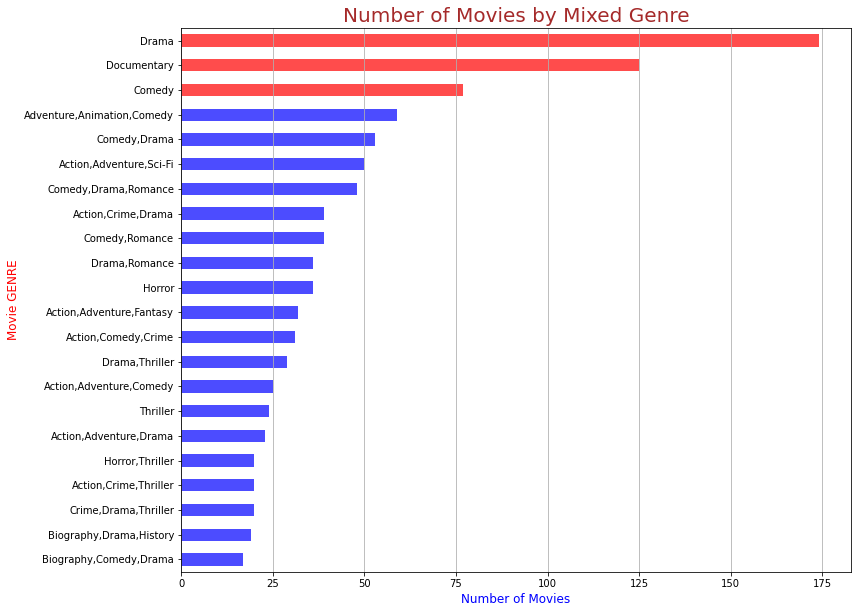

In [234]:
# Select Top 22 Mixed Genres to compare with single Genre

movie_mixed_genre_num = movie_clean_data['genres'].value_counts(ascending=True).tail(22)
color_n = ['red' if m > 60  else 'blue' for m in movie_mixed_genre_num]
ax = movie_mixed_genre_num.plot(kind='barh', color=color_n, alpha=0.7, figsize=(12, 10))
ax.set_title('Number of Movies by Mixed Genre', color='Brown', size=20)
ax.set_xlabel('Number of Movies', color='Blue', size=12)
ax.set_ylabel('Movie GENRE', color='Red', size=12)
ax.grid(True, axis='x');

Also, **'Drama'** is the most released movie genre.

#### * ROI BY MIXED GENRE

In [235]:
# Select Top 22 Mixed Genres to compare with single Genre

movie_mixed_genre_roi = movie_clean_data.groupby('genres').mean()['return_on_investment'].sort_values(ascending=True).tail(22)
movie_mixed_genre_roi

genres
Fantasy,Musical                  6.800000
Drama,Music,Musical              6.850000
Drama,Music,Romance              6.868333
Action,Drama,Sport               7.140000
Animation,Comedy,Family          7.298571
Mystery                          7.353333
Adventure,Family                 7.420000
Mystery,Sci-Fi,Thriller          7.700000
Adventure,Comedy,Horror          8.230000
Adventure,Biography,Comedy       8.330000
Comedy,Romance,Sci-Fi            8.570000
Fantasy,Horror                   8.970000
Action,Documentary,Drama         9.420000
Adventure,Drama,Fantasy          9.770000
Horror,Mystery,Sci-Fi           10.835000
Comedy,Mystery                  10.945000
Comedy,Fantasy,Sci-Fi           11.180000
Drama,Mystery                   11.330000
Drama,Fantasy,Music             11.710000
Adventure,Drama,Western         12.100000
Animation,Documentary,Sci-Fi    12.610000
Action,Mystery,Sci-Fi           13.260000
Name: return_on_investment, dtype: float64

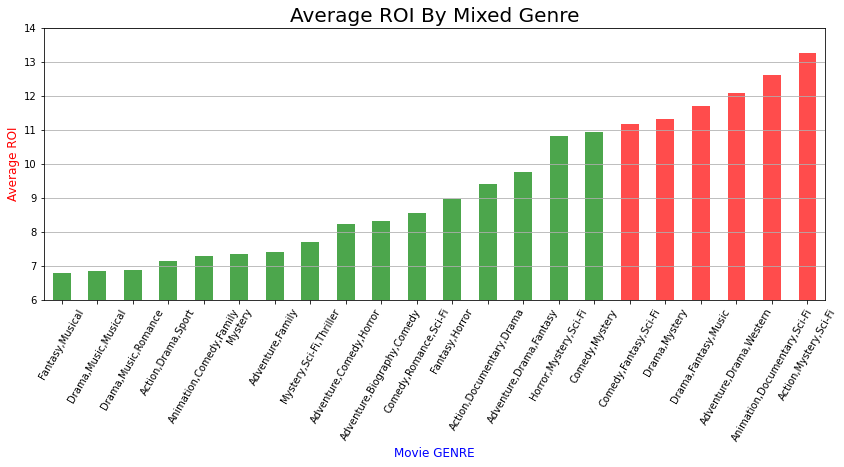

In [236]:
color_g = ['red' if roi >= 11  else 'green' for roi in movie_mixed_genre_roi]
ax = movie_mixed_genre_roi.plot(kind='bar', color=color_g, alpha = 0.7, rot=60, figsize=(14, 5))
ax.set_title('Average ROI By Mixed Genre', size=20)
ax.set_xlabel('Movie GENRE', color='Blue', size=12)
ax.set_ylabel('Average ROI', color='Red', size=12)
ax.set_ylim(6, 14)
ax.grid(True, axis='y');

A  mixture of **Action-Mystery-Sci-Fi** is the most profitable, then ***Animation-Documentary-Sci-Fi, Adventure-Drama-Western, Drama-Fantasy-Music, Drama-Mystery, and Comedy-Fantasy-Sci-Fi***.

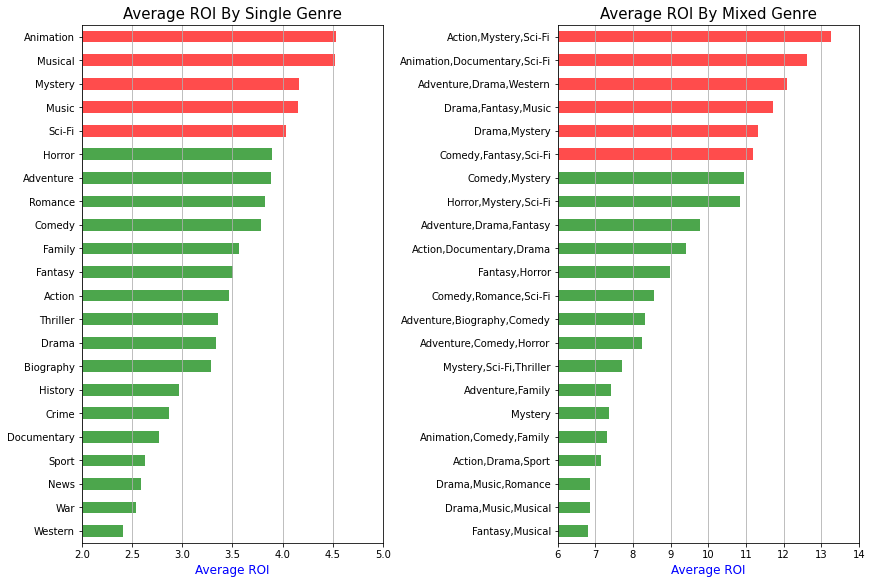

In [237]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

color_sg = ['red' if roi > 4  else 'green' for roi in movie_genre_roi]
ax1 = movie_genre_roi.plot(ax=axes[0], kind='barh', color=color_sg, alpha=0.7, rot=0)
ax1.set_title('Average ROI By Single Genre', size=15)
ax1.set_xlabel('Average ROI', color='Blue', size=12)
ax1.set_xlim(2, 5)
ax1.set_ylabel('')
ax1.grid(True, axis='x')

color_mg = ['red' if roi >= 11  else 'green' for roi in movie_mixed_genre_roi]
ax2 = movie_mixed_genre_roi.plot(ax=axes[1], kind='barh', color=color_mg, alpha=0.7, rot=0)
ax2.set_title('Average ROI By Mixed Genre', size=15)
ax2.set_xlabel('Average ROI', color='Blue', size=12)
ax2.set_xlim(6, 14)
ax2.set_ylabel('')
ax2.grid(True, axis='x');

Most profitable ***Single genres*** : **Animation, Musical, Mystery, Music, Sci-Fi**    
                ***Mixed genres*** : **Action-Mystery-Sci-Fi, Animation-Documentary- Sci-Fi, Adventure-Drama-Western, 
               Drama-Fantasy-Music, Drama-Mystery, Comedy-Fantasy-Sci-fi.**   
The genres that appear in common and most frequently in the single and mixed genres are **Mystery, Sci-Fi, Animation, Drama, Fantasy**. So, it seems good to **mix 2 or more of these genres** to make a movie.

## <span style='color:blue'>2. How Much to Invest (BUDGET)</span>

The second issue is the **Budget**.  ***How much money to invest*** also  matters when making a movie.

#### * Segment the budget

In [238]:
# make 22 bins in increments of 20 Million

bins = list(range(0, 460, 20))
bins

[0,
 20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440]

In [239]:
# segment the production budget into 22 bins 

bins = list(range(0, 460, 20))
labels = ["Less than "+ str(x + 20) for x in bins]
movie_clean_data['budget_size'] = pd.cut(movie_clean_data["production_budget"], bins = bins, right=False, labels = labels[:-1])
movie_clean_data

,movie_title,production_budget,return_on_investment,release_month,genres,genre_list,budget_size
0,Avatar,425.00,8.32,12,Horror,[Horror],Less than 440
1,Pirates of the Caribbean: On Stranger Tides,410.60,3.13,5,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]",Less than 420
2,Dark Phoenix,350.00,0.55,6,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Less than 360
3,Avengers: Age of Ultron,330.60,5.63,5,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Less than 340
4,Avengers: Infinity War,300.00,9.09,4,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Less than 320
...,...,...,...,...,...,...,...
3322,Counting,0.05,0.33,7,Documentary,[Documentary],Less than 20
3323,Raymond Did It,0.04,0.18,2,Horror,[Horror],Less than 20
3324,Krisha,0.03,9.65,3,Drama,[Drama],Less than 20
3327,Emily,0.03,0.26,1,Documentary,[Documentary],Less than 20


#### * Number of Movies by Budget Size

In [240]:
movie_budget_num = movie_clean_data['budget_size'].value_counts().sort_index()
movie_budget_num

Less than 20     827
Less than 40     433
Less than 60     208
Less than 80     118
Less than 100     75
Less than 120     43
Less than 140     42
Less than 160     35
Less than 180     36
Less than 200     18
Less than 220     19
Less than 240      4
Less than 260      6
Less than 280      5
Less than 300      0
Less than 320      3
Less than 340      1
Less than 360      1
Less than 380      0
Less than 400      0
Less than 420      1
Less than 440      1
Name: budget_size, dtype: int64

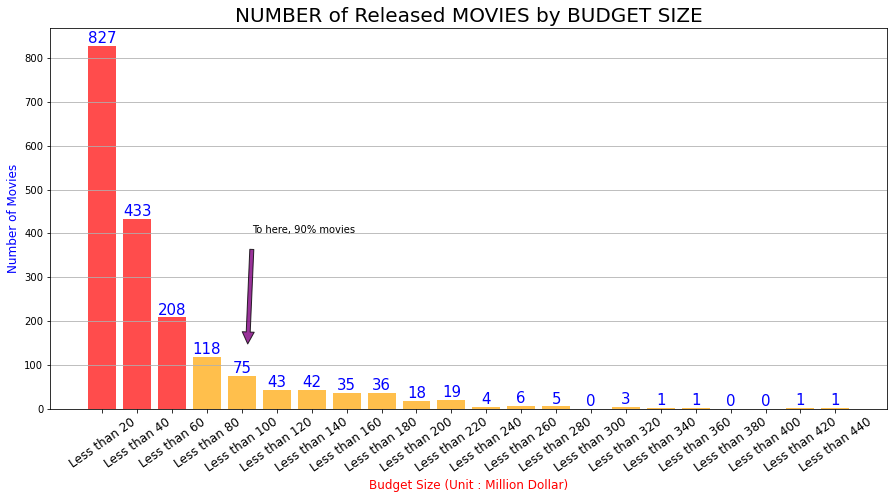

In [241]:
color_n = ['red' if num > 150  else 'orange' for num in movie_budget_num]
x = movie_budget_num.index
y = movie_budget_num
plt.figure(figsize=(15, 7))
plt.xticks(rotation = 35, size=12)
plt.title('NUMBER of Released MOVIES by BUDGET SIZE', size=20)
plt.xlabel("Budget Size (Unit : Million Dollar)", color='red', size=12)
plt.ylabel("Number of Movies", color='blue', size=12)
plt.grid(axis = 'y')
plt.bar(x, y, color = color_n, alpha = 0.7)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i], fontsize = 15, color='blue', horizontalalignment='center',  verticalalignment='bottom')
plt.annotate('To here, 90% movies', xy=(4.15, 120), xytext=(4.3, 400), arrowprops=dict(facecolor='purple', shrink=0.1, alpha=0.8));

**Less than 20 Million Dollar Budget Size** has the largest number of movies (about 45%) and about 90% of movies were made with a budget of 100 Million or less.

#### * ROI by Budget Size

In [242]:
movie_budget_roi = movie_clean_data.groupby('budget_size').mean()['return_on_investment']
movie_budget_roi

budget_size
Less than 20     3.302624
Less than 40     3.310185
Less than 60     3.380192
Less than 80     3.332458
Less than 100    3.755200
Less than 120    3.560698
Less than 140    4.161667
Less than 160    3.752571
Less than 180    4.528889
Less than 200    4.018333
Less than 220    6.126842
Less than 240    3.700000
Less than 260    5.295000
Less than 280    2.674000
Less than 300         NaN
Less than 320    5.213333
Less than 340    5.630000
Less than 360    0.550000
Less than 380         NaN
Less than 400         NaN
Less than 420    3.130000
Less than 440    8.320000
Name: return_on_investment, dtype: float64

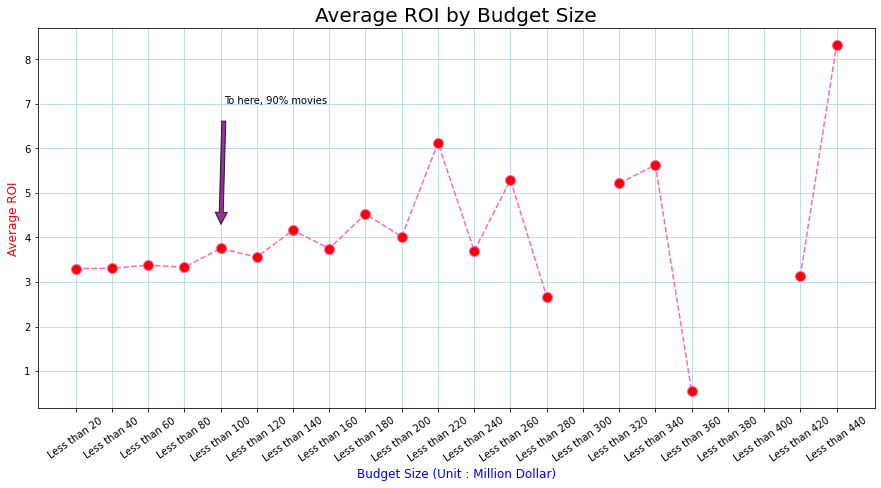

In [243]:
ax = movie_budget_roi.plot(color='hotpink', ls='dashed', marker='o', markersize=10, markerfacecolor='r', rot=35, figsize=(15, 7))
ax.set_title('Average ROI by Budget Size', size=20)
ax.set_xlabel('Budget Size (Unit : Million Dollar)', color='blue', size=12)
ax.set_xticks(range(0, len(movie_budget_roi.index)))
ax.set_xticklabels(movie_budget_roi.index)
ax.set_ylabel('Average ROI', color='red', size=12)
ax.grid(True, color='lightblue')
ax.annotate('To here, 90% movies', xy=(4.0, 4), xytext=(4.1, 7), arrowprops=dict(facecolor='purple', shrink=0.1, alpha=0.8));

Of the 1876 movies, 90% of movies are with a budget of less than 1 million, and their ROI does not show much difference.   The movies made on a budget of over 1 million are too few to be considered.

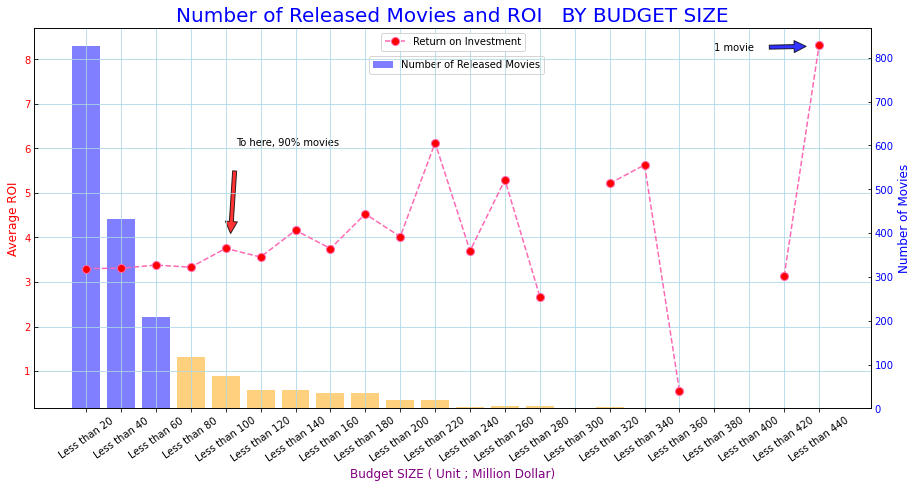

In [244]:
plt.rcParams['figure.figsize'] = (15, 7)
fig, ax1 = plt.subplots()

x = movie_budget_roi.index
y = movie_budget_roi
ax1.plot( x, y, color='hotpink', ls='dashed', marker='o', markersize=8, markerfacecolor='r', label='Return on Investment')
ax1.set_title('Number of Released Movies and ROI   BY BUDGET SIZE', color='blue', size=20)
ax1.set_xlabel('Budget SIZE ( Unit ; Million Dollar)', color='purple', size=12)
ax1.tick_params(axis='x', rotation=35)
ax1.set_ylabel('Average ROI', size=12, color='red')
ax1.tick_params(axis='y', labelcolor='red', direction='in')
ax1.grid(True, color='lightblue')
ax1.annotate('1 movie', xy=(21, 8.3), xytext=(18, 8.2), arrowprops=dict(facecolor='b', shrink=0.2, alpha=0.8))

color_n = ['blue' if num > 150  else 'orange' for num in movie_budget_num]
x2 = movie_budget_num.index
y2 = movie_budget_num
ax2 = ax1.twinx()
ax2.bar(x2, y2, color=color_n, alpha=0.5, label='Number of Released Movies',)
ax2.set_ylabel('Number of Movies', size=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue', direction='in')
ax2.annotate('To here, 90% movies', xy=(4.1, 350), xytext=(4.3, 600), arrowprops=dict(facecolor='r', shrink=0.2, alpha=0.8))

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper center')
ax2.legend(loc = (0.4, 0.88));

About 90% of movies are being made on a budget of less than 1 million, so it seems reasonable not to exceed 1 million as a budget.

## <span style='color:blue'>3. When To Release</span>

In the film industry, it is also considered very important to set the release date of the produced film.

#### * Number of Released Movies By Month

In [245]:
movie_data_month = movie_clean_data['release_month'].value_counts().sort_index()
movie_data_month

1     121
2     127
3     166
4     167
5     129
6     151
7     139
8     156
9     180
10    185
11    167
12    188
Name: release_month, dtype: int64

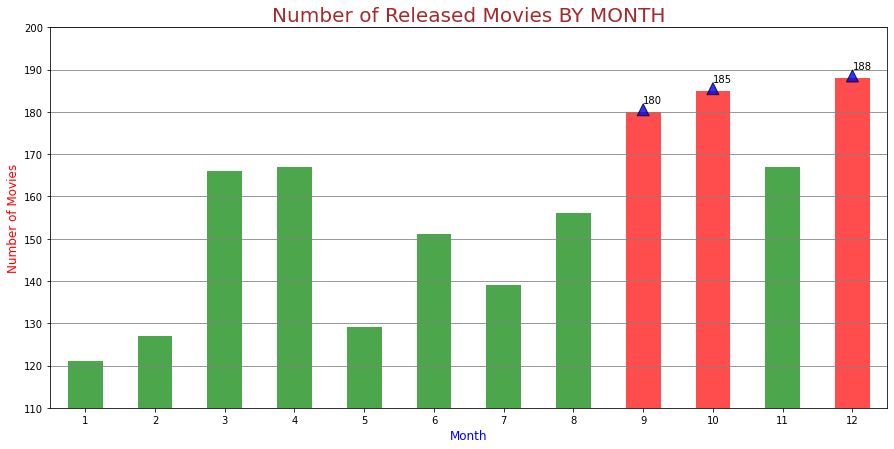

In [246]:
color_n = ['red' if m >= 170  else 'green' for m in movie_data_month]
ax = movie_data_month.plot.bar(color=color_n, alpha=0.7, figsize = (15, 7), rot=0)
ax.set_title('Number of Released Movies BY MONTH', color='brown', size = 20)
ax.set_xlabel('Month', color='blue', size=12)
ax.set_ylabel('Number of Movies', color='red', size=12)
ax.set_ylim(110, 200)
ax.grid(True, axis='y', color='gray')
ax.annotate('188', xy=(11, 190), xytext=(11, 190), arrowprops=dict(facecolor='b', shrink=0.2, alpha=0.8))
ax.annotate('185', xy=(9, 187), xytext=(9, 187), arrowprops=dict(facecolor='b', shrink=0.2, alpha=0.8))
ax.annotate('180', xy=(8, 182), xytext=(8, 182), arrowprops=dict(facecolor='b', shrink=0.2, alpha=0.8));

The highest number of films was released in **December**, October, September. 

#### ROI By Month

In [247]:
movie_month_roi = movie_clean_data.groupby('release_month')['return_on_investment'].mean().sort_index()
movie_month_roi

release_month
1     3.613802
2     3.972677
3     3.400723
4     3.056048
5     3.333953
6     3.847417
7     3.527122
8     3.379679
9     3.144222
10    3.033027
11    3.791976
12    3.410691
Name: return_on_investment, dtype: float64

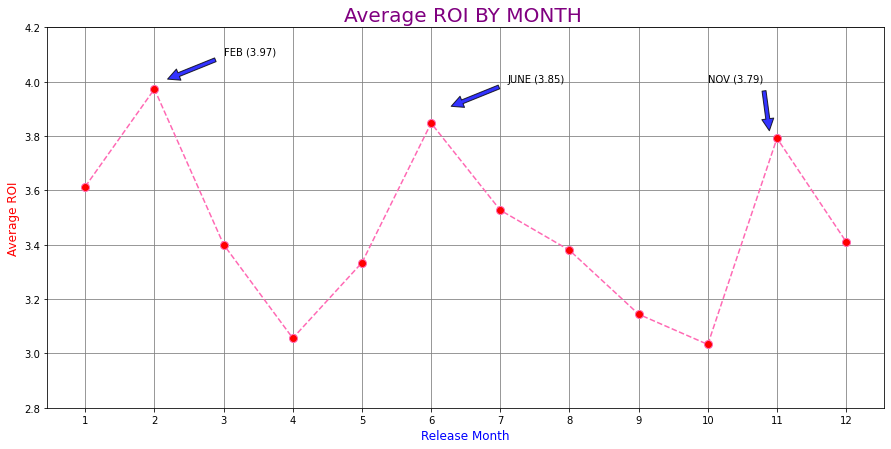

In [248]:
ax = movie_month_roi.plot(color='hotpink', ls='dashed', marker='o', markersize=8, markerfacecolor='r', rot=0, figsize=(15, 7))
ax.set_title('Average ROI BY MONTH ', color='purple', size = 20)
ax.set_xlabel('Release Month', color='blue', size=12)
# ax.set_xticks(range(0, len(movie_month_roi.index)))
# ax.set_xticklabels(movie_month_roi.index)
ax.set_xticks(np.arange(1, 13, 1))
ax.set_ylabel('Average ROI', color='red', size=12)
ax.set_ylim(2.8, 4.2)
ax.grid(True, color='gray')
ax.annotate('FEB (3.97)', xy=(2.1, 4.0), xytext=(3, 4.1), arrowprops=dict(facecolor='b', shrink=0.1, alpha=0.8))
ax.annotate('JUNE (3.85)', xy=(6.2, 3.9), xytext=(7.1, 4), arrowprops=dict(facecolor='b', shrink=0.1, alpha=0.8))
ax.annotate('NOV (3.79)', xy=(10.9, 3.8), xytext=(10, 4), arrowprops=dict(facecolor='b', shrink=0.1, alpha=0.8));

Films released in **<span style='color:red'>FEBRUARY,</span>  JUNE, NOVEMBER** are showing the best performance.

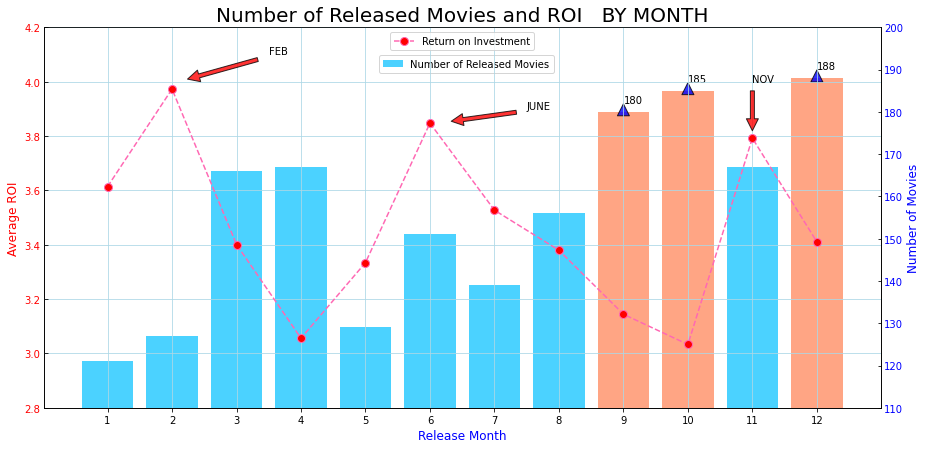

In [249]:
plt.rcParams['figure.figsize'] = (15, 7)
fig, ax1 = plt.subplots()

x = movie_month_roi.index
y = movie_month_roi
ax1.plot(x, y, color='hotpink', ls='dashed', marker='o', markersize=8, markerfacecolor='r', label='Return on Investment')
ax1.set_title('Number of Released Movies and ROI   BY MONTH', color='black', size=20)
ax1.set_xlabel('Release Month', color='blue', size=12)
ax1.set_xticks(np.arange(1, 13, 1))
ax1.set_ylabel('Average ROI', size=12, color='red')
ax1.set_ylim(2.8, 4.2)
ax1.tick_params(axis='y', labelcolor='red', direction='in')
ax1.grid(True, color='lightblue')
ax1.annotate('FEB', xy=(2.1, 4.0), xytext=(3.5, 4.1), arrowprops=dict(facecolor='r', shrink=0.1, alpha=0.8))
ax1.annotate('JUNE', xy=(6.2, 3.85), xytext=(7.5, 3.9), arrowprops=dict(facecolor='r', shrink=0.1, alpha=0.8))
ax1.annotate('NOV', xy=(11, 3.8), xytext=(11, 4), arrowprops=dict(facecolor='r', shrink=0.1, alpha=0.8))

color_n = ['coral' if m >= 170  else 'deepskyblue' for m in movie_data_month]
ax2 = ax1.twinx()
ax2.bar(movie_data_month.index, movie_data_month, color=color_n, alpha=0.7, label='Number of Released Movies')
ax2.set_ylim(110, 200)
ax2.set_ylabel('Number of Movies', size=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue', direction='in')
ax2.annotate('188', xy=(12, 190), xytext=(12, 190), arrowprops=dict(facecolor='b', shrink=0.2, alpha=0.8))
ax2.annotate('185', xy=(10, 187), xytext=(10, 187), arrowprops=dict(facecolor='b', shrink=0.2, alpha=0.8))
ax2.annotate('180', xy=(9, 182), xytext=(9, 182), arrowprops=dict(facecolor='b', shrink=0.2, alpha=0.8))

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper center')
ax2.legend(loc = (0.4, 0.88));

A number of films were released in ***December, October, September***, but the profitability was not very good. Rather, **movies released in <span style='color:red'>FEBRUARY</span>, JUNE, NOVEMBER are showing the best profitability**.

In [250]:
conn.close()

# Conclusion

1. The <span style='color:blue'>high 'ROI'</span> movie genres are <span style='color:red'>Animation', 'Musical', 'Mystery', 'Music' and 'Sci-Fi'</span>, whereas the <span style='color:brown'>most released</span> movie genres are <span style='color:purple'>'Drama', 'Comedy' and 'Action'</span>.<br>
However, a film cannot be made with just one genre. Therefore, it is necessary to mix several genres well, and as a result of this analysis, movies with the following genres mixed well showed good performance.<br>
High profitable Genres - **Mystery, Sci-Fi, Animation, Drama, Fantasy**.<br>
So, when making a movie, mixing 2 or more of these genres is recommended.

2. About 45% of movies were made with a budget of 20 million dollars or less, and about 90% of movies were made with a budget of 100 million dollars or less, and their ROI does not show much difference.  
The movies made on a budget of over 1 million are too few to be considered.  
So, as a first time trying, it seems reasonable not to exceed 100 million dollars as a budget when making a movie.

3. A number of films were released in December, October, September but the profitability was not very good. Rather, **movies released in <span style='color:red'>FEBRUARY</span>, JUNE, NOVEMBER are showing the best profitability**.<br>So, when deciding when to release a movie, it is best to release it in **February**, then **June** and **November** are the second best.